# Career Shifters

## Import Data and Library

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [64]:
df_2020 = pd.read_csv('./dataset/survey_results_public_2020.csv')

schema_2020 = pd.read_csv('./dataset/survey_results_schema_2020.csv')

## Business Understanding

We are trying to understand the perspective and behavior of career shifters. We will define a career shifter as a person who doesn't have formal education background on tech related field such as Computer Science, Information System, Mathematics, etc. but currently working as professional developers. The relevant questions are:

1. How do career shifters think about the importance of formal education for their career?
2. What is career shifters' behavior related to their career life?

By doing this analysis, I hope that can help everyone who wants to become a career shifter in tech field.

## Data Understanding and Preparation

Now we will see how the formal background differs from the survey participants.

In [65]:
df_2020['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

We now exclude all degrees which are related to tech field. Here I will exclude these majors:

1. Computer science, computer engineering, or software engineering
2. Information systems, information technology, or system administration
3. Mathematics or statistics
4. Web development or web design

In [66]:
related_degree = ['Computer science, computer engineering, or software engineering',
                  'Information systems, information technology, or system administration',
                  'Mathematics or statistics',
                  'Web development or web design']
d1 = dict.fromkeys(related_degree, 'related-degree')
df_2020['degree'] = df_2020['UndergradMajor'].map(d1)
career_shifters = df_2020[df_2020.degree != 'related-degree']
career_shifters['UndergradMajor'].value_counts()

Another engineering discipline (such as civil, electrical, mechanical, etc.)      4754
A natural science (such as biology, chemistry, physics, etc.)                     2205
A business discipline (such as accounting, finance, marketing, etc.)              1375
A humanities discipline (such as literature, history, philosophy, etc.)           1007
A social science (such as anthropology, psychology, political science, etc.)       933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     725
I never declared a major                                                           453
A health science (such as nursing, pharmacy, radiology, etc.)                      252
Name: UndergradMajor, dtype: int64

Now we have career_shifters dataframe which only contains people who doesn't have tech formal education background. Next we will check the missing values.

In [67]:
career_shifters['UndergradMajor'].isnull().mean()

0.5350019864918554

It is shown that we have 53% of missing values. If we remove missing values, we still have 11,704 people in the data so I will drop them to minimize bias.

In [68]:
career_shifters = career_shifters.dropna(subset=['UndergradMajor'], axis=0)
career_shifters.shape

(11704, 62)

Now we have our career_shifters dataframe ready. Next we will need to inspect an important column to select only professional developers, the MainBranch column. Missing value of that column will be checked.

In [69]:
career_shifters['MainBranch'].isnull().mean()

0.0037593984962406013

It is shown that we only have 0.03% of missing values, so I prefer to ignore those. 

In [70]:
career_shifters['MainBranch'].value_counts()

I am a developer by profession                                                   8048
I am not primarily a developer, but I write code sometimes as part of my work    2053
I am a student who is learning to code                                            833
I code primarily as a hobby                                                       492
I used to be a developer by profession, but no longer am                          234
Name: MainBranch, dtype: int64

## Data Analysis

### Formal Education Importance

To see the career shifters opinion on formal education importance for their career, we can see the question about Education Importance below:

In [71]:
schema_2020[schema_2020['Column'] == 'NEWEdImpt']['QuestionText'].values[0]

'How important is a formal education, such as a university degree in computer science, to your career?'

And below are the responses:

In [72]:
career_shifters['NEWEdImpt'].value_counts()

Somewhat important                    2904
Not at all important/not necessary    2735
Fairly important                      2271
Very important                        1736
Critically important                   853
Name: NEWEdImpt, dtype: int64

By selecting only people who is a developer by profession, we can see the results as follows:

In [73]:
ed_imp = career_shifters[['MainBranch', 'NEWEdImpt']][career_shifters['MainBranch'] == 'I am a developer by profession']
ed_imp = pd.crosstab(index=ed_imp['MainBranch'], columns=ed_imp['NEWEdImpt'])
ed_imp = ed_imp[['Not at all important/not necessary', 'Somewhat important', 'Fairly important', 'Very important', 'Critically important']]
ed_imp

NEWEdImpt,Not at all important/not necessary,Somewhat important,Fairly important,Very important,Critically important
MainBranch,,,,,
I am a developer by profession,2183,2365,1783,1173,428


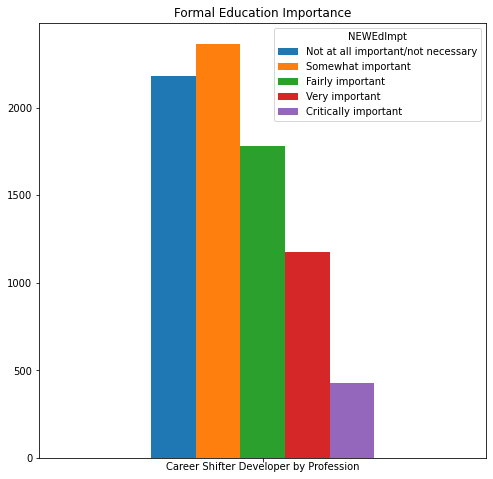

In [74]:
ed_imp.plot(kind='bar', figsize=(8,8), title='Formal Education Importance')
plt.xlabel('Career Shifter Developer by Profession')
plt.tick_params(labelbottom=False)

It is shown that the most of career shifters think that formal education is somewhat important or even not important at all. It is probably because they joined a developer bootcamp or did self-learning before they got a developer job. So for you who don't have formal education background, the chance is wide-opened!

### Behavior

Now we will check some of the career shifters behaviors related to their career. What I want to highlight are **what they do when they got stcuk** and **how often they learn new language**.

##### What do you do when you got stuck?

We will use this question:

In [75]:
schema_2020[schema_2020['Column'] == 'NEWStuck']['QuestionText'].values[0]

'What do you do when you get stuck on a problem? Select all that apply.'

Since the response is multiple answer, I will count all the response chosen. Then the result is as follows:

In [76]:
dev_pro = career_shifters[career_shifters['MainBranch'] == 'I am a developer by profession']['NEWStuck']
dev_pro = dev_pro.str.split(';', expand=True).stack().value_counts()
dev_pro

Visit Stack Overflow                                6841
Do other work and come back later                   4344
Call a coworker or friend                           4007
Go for a walk or other physical activity            3811
Watch help / tutorial videos                        3747
Meditate                                             854
Play games                                           812
Panic                                                808
Visit another developer community (please name):     761
dtype: int64

Text(0.5, 0, 'Career Shifter Developers by Profession')

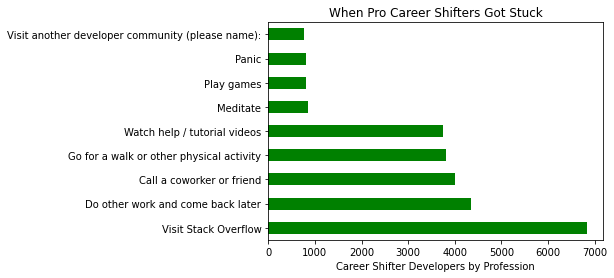

In [77]:
dev_pro.plot(kind='barh', title='When Pro Career Shifters Got Stuck', color='green')
plt.xlabel('Career Shifter Developers by Profession')

The majority of career shifters visit Stack Overflow when they got stuck. Makes sense though as we can simply type our error and usually there are people who had the same error with us on Stack Overflow. I also open Stack Overflow when I got stuck. Do other work or come back later is also an option of the majority career shifters.

##### How often they learn new languages?

We will use this question:

In [78]:
schema_2020[schema_2020['Column'] == 'NEWLearn']['QuestionText'].values[0]

'How frequently do you learn a new language or framework?'

By selecting only people who are developer as profession, the result is as follows:

In [79]:
new_language = career_shifters[['MainBranch', 'NEWLearn']][career_shifters['MainBranch'] == 'I am a developer by profession']
new_language = pd.crosstab(index=new_language['MainBranch'], columns=new_language['NEWLearn'])
new_language = new_language[['Every few months', 'Once a year', 'Once every few years', 'Once a decade']]
new_language

NEWLearn,Every few months,Once a year,Once every few years,Once a decade
MainBranch,,,,
I am a developer by profession,2318,2889,2041,165


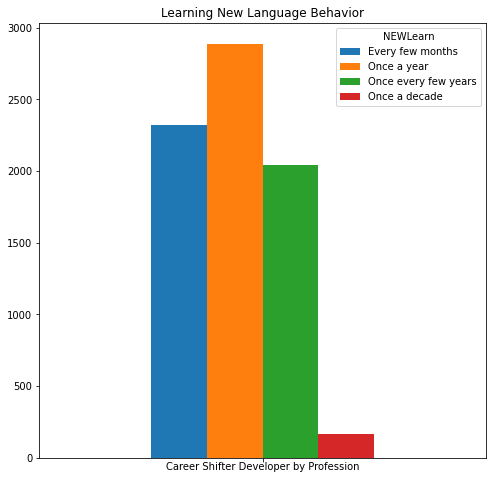

In [80]:
new_language.plot(kind='bar', figsize=(8,8), title='Learning New Language Behavior')
plt.xlabel('Career Shifter Developer by Profession')
plt.tick_params(labelbottom=False)

We can see that most of the career shifters learn new language once a year. Many of them also learn new language every few months. Looking at the frequency, we can see that most of them keep learning frequently to broaden their knowledge more and more!

## Results

We have seen the career shifters' opinion and behavior related to their career. To sum up, below are the bullet points we can take:

1. Most of career shifters think that **formal education is somewhat important or even not important at all**.
2. Regarding to the behavior on career life, most of career shifters **open Stack Overflow when they got stuck**. Most of them also **learn new language every year**.